# Assignment 1 Numerical Questions

## Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math as ma


def plot_fall(m, d, ax, tmax = 0):
    # Constants
    c1 = (1.55e-4)*d
    c2 = 0.22*d**2
    g = 9.8
    tol = 0.000002 # This is the tolerance of the change in velocity
    dt = 0.001

    # Setting up dv/dt equation
    F_d = sp.Function('F_d')
    v = sp.Symbol('v')
    F_d = -c1*v - c2*v**2
    F_g = m*g
    a = (F_d + F_g)/m
    dvdt = sp.lambdify(v, a)

    # Calculating terminal velocity
    vt = max(sp.solve(a, v))

    # This is where the magic happens...
    def step(v, dt):
        return v + dt*(dvdt(v))

    t0 = 0
    v0 = 0
    t = [t0]
    v = [v0]

    if tmax > 0:
        while t[-1] < tmax:
            v.append(step(v[-1], dt))
            t.append(t[-1] + dt)
    else:
        while True:
            v.append(step(v[-1], dt))
            t.append(t[-1] + dt)
            if abs(v[-1] - v[-2]) < tol:
                break

    ax.set_title("Velocity of a Falling Object")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Velocity (m/s) [down]")
    ax.plot(t, v, label = "m: " + str(m) + " kg, d: " +str(d)+ " m")
    ax.plot(t, [vt]*len(t), linestyle= '--', label = '$v_t =$'+str(round(vt, 4))+" m/s")
    ax.legend()


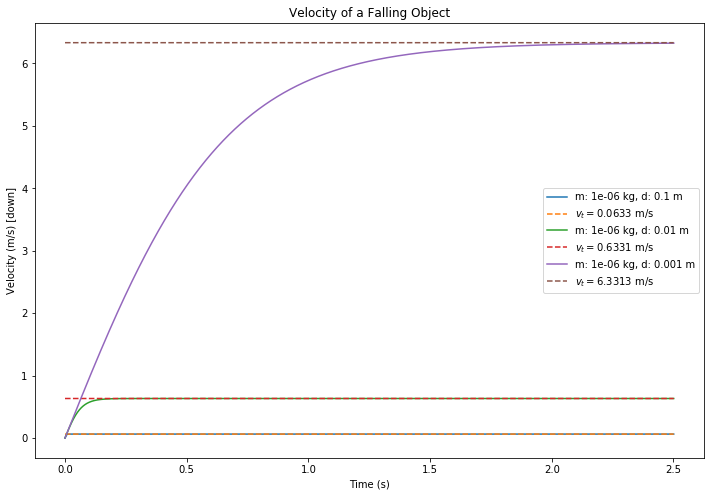

In [2]:
# Plot 1
mass = 1e-6
diam = [1e-1, 1e-2, 1e-3]
fig, ax1 = plt.subplots(figsize=(12,8))
tmax = 2.5

for d in diam:
    plot_fall(mass, d, ax1, tmax)


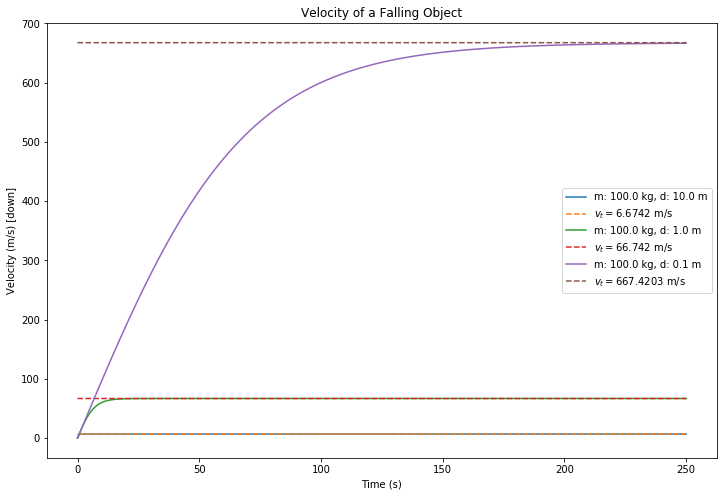

In [3]:
# Plot 2
mass = 1e2
diam = [1e1, 1e0, 1e-1]
fig, ax2 = plt.subplots(figsize=(12,8))
tmax = 250

for d in diam:
    plot_fall(mass, d, ax2, tmax)
    

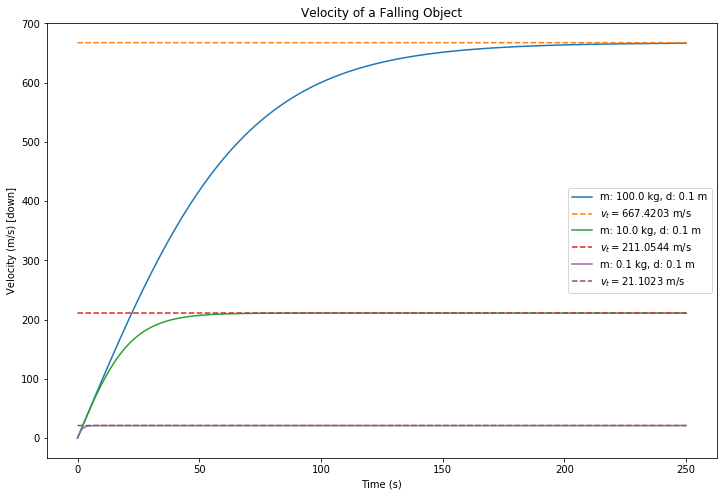

In [4]:
# Plot 3
mass = [1e2, 1e1, 1e-1]
diam = 1e-1
fig, ax3 = plt.subplots(figsize=(12,8))
tmax = 250

for m in mass:
    plot_fall(m, diam, ax3, tmax)
    

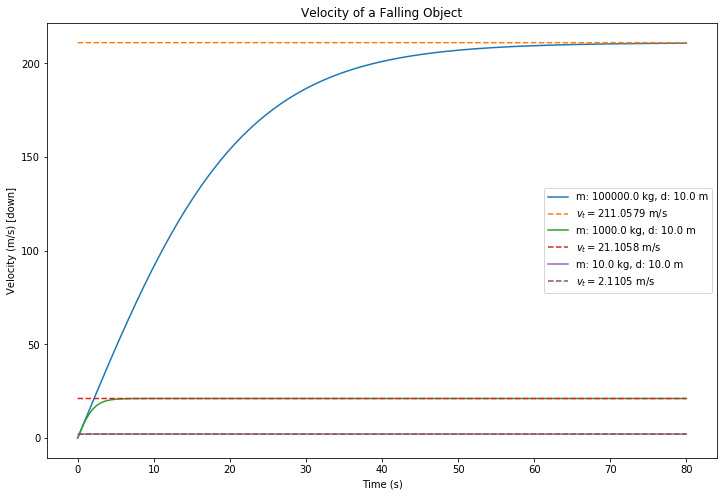

In [5]:
# Plot 4
mass = [1e5, 1e3, 1e1]
diam = 1e1
fig, ax4 = plt.subplots(figsize=(12,8))
tmax = 80

for m in mass:
    plot_fall(m, diam, ax4, tmax)
    

## Q2

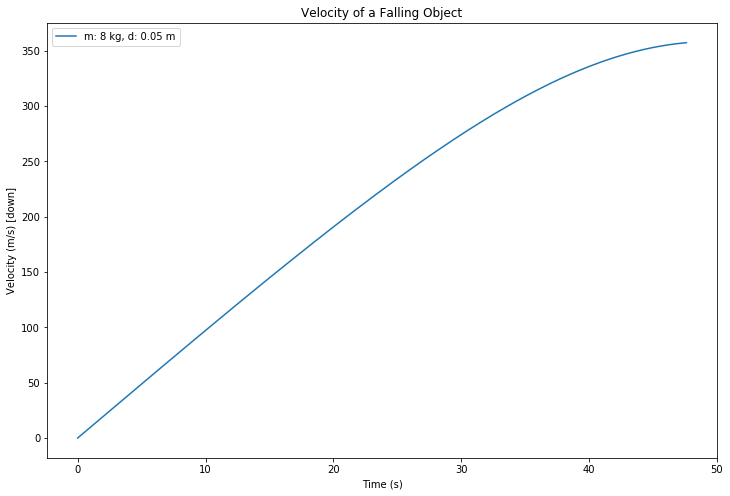

In [9]:
# Constants 
m = 8
d = 0.05
y0 = 10000
c1 = c1g = (1.55e-4)*d
c2 = c2g = 0.22*d**2
g = g0 = 9.81
Re = 6370e3
dt = 0.001

# Setting up dv/dt equation
dvdt = lambda v, c1, c2, g: -(c1/m)*v - (c2/m)*v**2 + g

# This is where the magic happens...
def step(v, y, c1, c2, g, dt):
    c1 = c1g*ma.exp(-y/7000)
    c2 = c2g*ma.exp(-y/7000)
    g = g0/((1 + y/Re)**2)
    v = v + dt*(dvdt(v, c1, c2, g))
    y = y - dt*v
    return [v, y, c1, c2, g]

t0 = 0
v0 = 0
t = [t0]
v = [v0]
y = [y0]

while y[-1] > 0:
    res = step(v[-1], y[-1], c1, c2, g, dt)
    v.append(res[0])
    y.append(res[1])
    c1 = res[2]
    c2 = res[3]
    g = res[4]
    t.append(t[-1] + dt)

fig, ax1 = plt.subplots(figsize=(12,8)) # Speed as a function of time
ax1.set_title("Velocity of a Falling Object")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (m/s) [down]")
ax1.plot(t, v, label = "m: " + str(m) + " kg, d: " +str(d)+ " m")
ax1.legend()


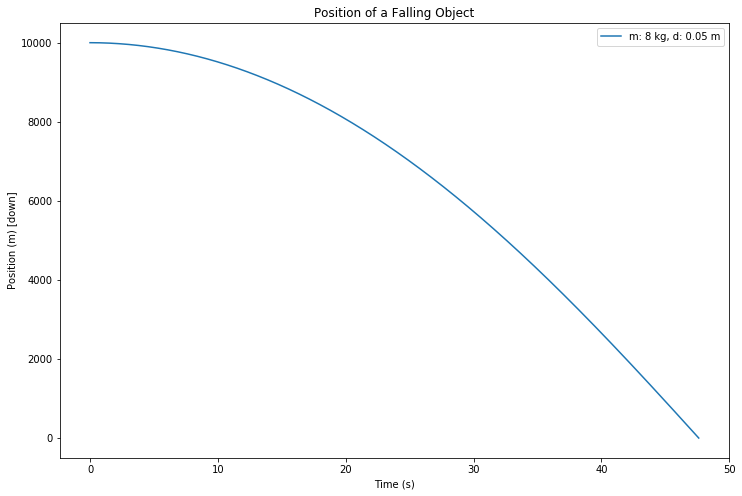

In [10]:
fig, ax2 = plt.subplots(figsize=(12,8)) # Position as a function of time
ax2.set_title("Position of a Falling Object")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Position (m) [down]")
ax2.plot(t, y, label = "m: " + str(m) + " kg, d: " +str(d)+ " m")
ax2.legend()


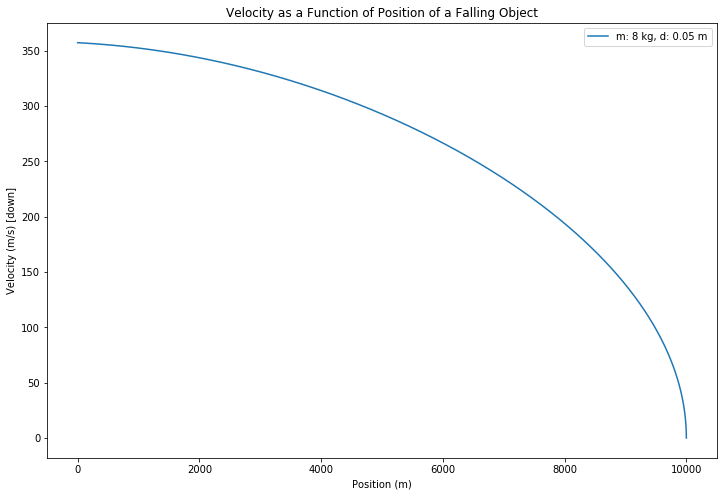

In [11]:
fig, ax3 = plt.subplots(figsize=(12,8)) # Speed as a function of position
ax3.set_title("Velocity as a Function of Position of a Falling Object")
ax3.set_xlabel("Position (m)")
ax3.set_ylabel("Velocity (m/s) [down]")
ax3.plot(y, v, label = "m: " + str(m) + " kg, d: " +str(d)+ " m")
ax3.legend()
